# Syed Muhammad Zain Computer Vision AUTOENCODER


## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [3]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [4]:
Train_data1.shape

(112800, 785)

In [5]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [6]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [7]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [8]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [10]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [11]:
#normalizing x and one hot encoding y both are not dataframes
trainingx = trainingx.astype('float32') / 255
NOL=trainingy.nunique()#numberofthelabels
trainingy = np_utils.to_categorical(trainingy, NOL)
trainingx=trainingx.reshape(-1,28,28,1)#batch size first than width than height than channels
print(trainingy.shape)
print(trainingx.shape)

(112800, 47)
(112800, 28, 28, 1)


In [12]:
#same for testining 
test_data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-test.csv', header=None)
test_data1.shape
XTest=test_data1.drop(0,axis=1)
YTest=test_data1[0]
print(XTest.shape)
print(YTest.shape)
XTest=np.apply_along_axis(correctingimage, 1, XTest)
YTest=np_utils.to_categorical(YTest, NOL)
print(XTest.shape)
print(YTest.shape)
XTest = XTest.astype('float32') / 255
XTest= XTest.reshape(-1, 28, 28, 1)
print(XTest.shape)

(18800, 784)
(18800,)
(18800, 28, 28)
(18800, 47)
(18800, 28, 28, 1)


## ADDING GAUSSIAN NOISE

In [13]:
def noiseforimage(input1):#mean 0 variance 1
    noisemagnitude = 0.4
    noisyO = input1 + noisemagnitude * np.random.normal(
        loc=0.0, scale=1.0, size=input1.shape
    )

    return np.clip(noisyO, 0.0, 1.0)

In [14]:
NXT=noiseforimage(trainingx)
NXTest=noiseforimage(XTest)

In [15]:
print(NXT.shape)
print(NXTest.shape)

(112800, 28, 28, 1)
(18800, 28, 28, 1)


## Building autoencoder and running it

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
Inputlayer1 = layers.Input(shape=(28, 28, 1))
#the y labels are not needed
# Encoder layers
EAD = layers.Conv2D(48, (3, 3), activation="relu", padding="same")(Inputlayer1)
EAD = layers.MaxPooling2D((2, 2), padding="same")(EAD)
EAD = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(EAD)
EAD = layers.MaxPooling2D((2, 2), padding="same")(EAD)
EAD=  layers.Conv2D(16, (3, 3), activation="relu", padding="same")(EAD)
EAD=  layers.Conv2D(8, (3, 3), activation="relu", padding="same")(EAD)
EAD=  layers.Conv2D(4, (3, 3), activation="relu", padding="same")(EAD)
# Decoder layers
EAD=  layers.Conv2D(8, (3, 3), activation="relu", padding="same")(EAD)
EAD=  layers.Conv2D(16, (3, 3), activation="relu", padding="same")(EAD)
EAD=  layers.Conv2D(32, (3, 3), activation="relu", padding="same")(EAD)
EAD = layers.UpSampling2D((2,2),interpolation='nearest')(EAD)
EAD=  layers.Conv2D(48, (3, 3), activation="relu", padding="same")(EAD)
EAD = layers.UpSampling2D((2,2),interpolation='nearest')(EAD)
EAD= layers.Conv2D(1,(3, 3), activation="sigmoid", padding="same")(EAD)
ModelAuto = Model(Inputlayer1, EAD)

ModelAuto.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 48)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        13856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160  

In [17]:
Opti=Adam(lr=0.001)
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
ROP = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=1,min_lr=0.00001)
EarlyS=EarlyStopping( monitor='val_loss',patience=3,mode="min")
saving_best_model_weights= ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/CV emnist project/CVmodel3.h5', save_best_only=True, monitor='val_loss', mode='auto')

In [21]:
ModelAuto.compile(loss="binary_crossentropy", optimizer=Opti)

In [22]:
ModelAuto.fit(
    x=NXT,
    y=trainingx,
    epochs=8,
    batch_size=128,
    shuffle=True,
    validation_data=(NXTest,XTest),
    callbacks=[saving_best_model_weights]
)

Epoch 1/8
882/882 [==============================] - 437s 495ms/step - loss: 0.1415 - val_loss: 0.1391
Epoch 2/8
882/882 [==============================] - 431s 489ms/step - loss: 0.1384 - val_loss: 0.1375
Epoch 3/8
882/882 [==============================] - 423s 480ms/step - loss: 0.1370 - val_loss: 0.1367
Epoch 4/8
882/882 [==============================] - 429s 487ms/step - loss: 0.1361 - val_loss: 0.1364
Epoch 5/8
882/882 [==============================] - 423s 479ms/step - loss: 0.1354 - val_loss: 0.1356
Epoch 6/8
882/882 [==============================] - 419s 475ms/step - loss: 0.1349 - val_loss: 0.1350
Epoch 7/8
882/882 [==============================] - 419s 475ms/step - loss: 0.1345 - val_loss: 0.1345
Epoch 8/8
882/882 [==============================] - 425s 482ms/step - loss: 0.1341 - val_loss: 0.1344


In [25]:
ModelAutoOut = ModelAuto.predict(NXTest)

## Comparison of Noisy input with Autoencoder output

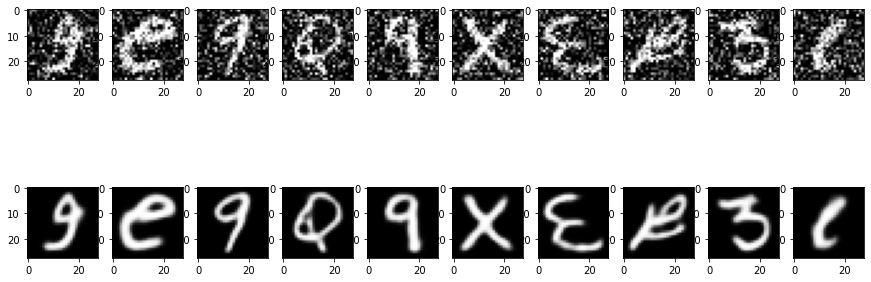

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(2,10,1)
plt.imshow(NXTest[0].reshape(28, 28), cmap='gray')
plt.subplot(2,10,2)
plt.imshow(NXTest[1].reshape(28, 28), cmap='gray')
plt.subplot(2,10,3)
plt.imshow(NXTest[2].reshape(28, 28), cmap='gray')
plt.subplot(2,10,4)
plt.imshow(NXTest[3].reshape(28, 28), cmap='gray')
plt.subplot(2,10,5)
plt.imshow(NXTest[4].reshape(28, 28), cmap='gray')
plt.subplot(2,10,6)
plt.imshow(NXTest[5].reshape(28, 28), cmap='gray')
plt.subplot(2,10,7)
plt.imshow(NXTest[6].reshape(28, 28), cmap='gray')
plt.subplot(2,10,8)
plt.imshow(NXTest[7].reshape(28, 28), cmap='gray')
plt.subplot(2,10,9)
plt.imshow(NXTest[8].reshape(28, 28), cmap='gray')
plt.subplot(2,10,10)
plt.imshow(NXTest[9].reshape(28, 28), cmap='gray')
plt.subplot(2,10,11)
plt.imshow(ModelAutoOut[0].reshape(28, 28), cmap='gray')
plt.subplot(2,10,12)
plt.imshow(ModelAutoOut[1].reshape(28, 28), cmap='gray')
plt.subplot(2,10,13)
plt.imshow(ModelAutoOut[2].reshape(28, 28), cmap='gray')
plt.subplot(2,10,14)
plt.imshow(ModelAutoOut[3].reshape(28, 28), cmap='gray')
plt.subplot(2,10,15)
plt.imshow(ModelAutoOut[4].reshape(28, 28), cmap='gray')
plt.subplot(2,10,16)
plt.imshow(ModelAutoOut[5].reshape(28, 28), cmap='gray')
plt.subplot(2,10,17)
plt.imshow(ModelAutoOut[6].reshape(28, 28), cmap='gray')
plt.subplot(2,10,18)
plt.imshow(ModelAutoOut[7].reshape(28, 28), cmap='gray')
plt.subplot(2,10,19)
plt.imshow(ModelAutoOut[8].reshape(28, 28), cmap='gray')
plt.subplot(2,10,20)
plt.imshow(ModelAutoOut[9].reshape(28, 28), cmap='gray')
